# Проект: исследование рынка общественного питания в Москве  

## Ведение

Инвесторов нового оригинального кафе в Москве, где гостей обслуживают роботы, интересует текущее положение дел на рынке. Проект многообещающий, но дорогой. Нужно понять, сможет ли кафе снискать популярность на долгое время.  

**Цель:** исследовать рынок общественного питания в Москве и дать рекомендации о выборе типа заведения, количестве посадочных мест, а также районе расположения.

Исследование проводится в  этапа:  

1. Обзор данных  
2. Предобработка данных  
3. Исследовательский анализ данных  

## Обзор данных  

Ознакомимся с входными данными.

In [1]:
#импортируем библиотеки

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#игнорируем предупреждения

import warnings

warnings.filterwarnings('ignore') 

In [3]:
#снимем ограничения на вывод строк
pd.set_option('display.max_rows', None)

Прочитаем файлы с данными.

In [4]:
#прочитаем файл с данными и сохраним его в переменную

data = pd.read_csv('/datasets/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
data.info() #получим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В наличии следующие данные:  

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

### Вывод  

В таблице 6 столбцов, названия столбцов написаны в одном стиле. В каждой строке таблицы — данные о заведение общественного питания: название, тип, относится ли к сетевому, адрес и кол-во посадочных мест.  

Пропусков значений нет. Типы данных корректны.

## Предобработка данных  

- Приведем написание значений в столбцах к одному регистру

In [6]:
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()
data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


- Проверим корректность значений

In [7]:
#выведет уникальные значения для столбцов

display(data['chain'].unique())
display(data['object_type'].unique())

display(data['object_name'].value_counts())

array(['нет', 'да'], dtype=object)

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

столовая                                                                                                321
кафе                                                                                                    278
шаурма                                                                                                  250
шоколадница                                                                                             158
kfc                                                                                                     155
макдоналдс                                                                                              151
бургер кинг                                                                                             137
теремок                                                                                                  94
домино'с пицца                                                                                           90
крошка картошка             

Некоторые названия одних и тех же заведений написаны по-разному. Но это не помнешает нашему исследованию, поэтому оставим такое написание.

Заменим длинные названия типов заведений на короткие, для удобной работы с графиками

In [8]:
#заменим значения 'магазин (отдел кулинарии)' на 'магазин' и 'предприятие быстрого обслуживания' на 'пбо'

data.loc[data['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'магазин'
data.loc[data['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'пбо'

Определим нет ли отрицательных значений в столбце number

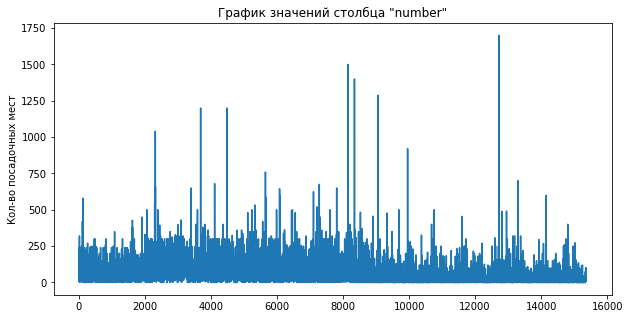

In [9]:
#построим график для столбца number

data['number'].plot(figsize=(10,5))
plt.title('График значений столбца "number"')
plt.ylabel('Кол-во посадочных мест');

Отрицательных значений нет, но есть заведения с очень большим кол-вом посадочных мест. 

In [10]:
#выведем заведения с кол-вом посадочных мест больше 500

data.loc[data.loc[:,'number'] > 500]

,id,object_name,chain,object_type,address,number
120,26075,макдоналдс,да,пбо,"город москва, большая бронная улица, дом 29",580
2294,26988,ресторан «михаил светлов»,нет,ресторан,"город москва, измайловское шоссе, дом 71, корп...",542
2313,26560,ресторан «альфа»,нет,ресторан,"город москва, измайловское шоссе, дом 71, корп...",1040
2317,73306,ресторан «бета»,нет,ресторан,"город москва, измайловское шоссе, дом 71, корп...",660
3401,135197,дурдинъ,нет,ресторан,"город москва, мичуринский проспект, дом 8, стр...",650
3686,27026,рум сервис,нет,ресторан,"город москва, площадь европы, дом 2",1200
4110,29320,столовая,нет,столовая,"город москва, каширское шоссе, дом 31",680
4480,27024,рум сервис,нет,ресторан,"город москва, кутузовский проспект, дом 2/1, с...",1200
5327,23165,кардинал,нет,кафе,"город москва, хибинский проезд, дом 14, строен...",533
5649,29232,столовая московский гуманитарный университет,нет,столовая,"город москва, улица юности, дом 5, строение 1",760


Почти все заведения с очень большим кол-вом мест относятся к столовым или ресторанам. Исключения: Аrena by soho family - это концертный зал, в котором есть бар, поэтому указано так много мест, Eataly - это рынок с большим кол-вом точек общественного питания, а не одно заведение, комбинат питания «управление академсервис», скорее всего, представляет организацию, в которую входят несколько столовых и в таблице указано суммарное кол-во посадочных мест.  

Уберем из таблицы "сомнительные" заведения, где посадочных мест больше 1000.

In [11]:
data = data.loc[data.loc[:,'number'] < 1000]

- Проверим наличие дубликатов

In [12]:
#найдем сумму явных дубликатов в таблицах

data.duplicated().sum()

0

### Вывод  

Проверили данные на наличие дубликатов, уникальных и отрицательных значений: данные корректны, дубликатов нет.

## Исследовательский анализ данных  



#### Исследуем соотношение видов объектов общественного питания по количеству

In [13]:
#сгруппируем все объекты по типам c помощью сводной таблицы

data.pivot_table(index=['object_type'], values='object_name', aggfunc='count')

,object_name
object_type,
бар,855
буфет,585
закусочная,360
кафе,6099
кафетерий,398
магазин,273
пбо,1923
ресторан,2281
столовая,2585


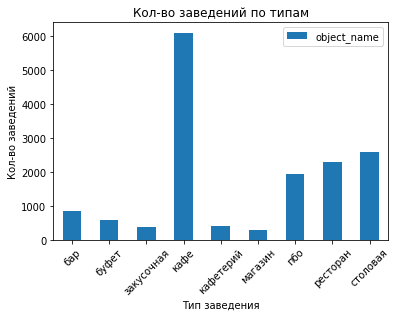

In [14]:
#построим гистограмму по сводной таблице

data.pivot_table(index=['object_type'], values='object_name', aggfunc='count').plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Кол-во заведений по типам')
plt.xlabel('Тип заведения')
plt.ylabel('Кол-во заведений');

##### Вывод 
Самые распространенные из всех - заведения типа "Кафе", их 6099 штук, что примерно в три раза больше следующих по популярности заведений: "Ресторан" и "Столовая".  
Наименьшее кол-во закусочных и отделов общепита в магазинах.

#### Исследуем соотношение сетевых и несетевых заведений по количеству

In [15]:
#сгруппируем все объекты по сетевым и несетевым c помощью сводной таблицы

data.pivot_table(index=['chain'], values='object_name', aggfunc='count')

,object_name
chain,
да,2968
нет,12391


Определим для какого вида объекта общественного питания характерно сетевое распространение

In [16]:
#выведем сводную таблицу по типу заведений и кол-ву сетевых и несетевых
data_pivot = data.pivot_table(index=['object_type'], columns='chain', values='object_name', aggfunc='count')

data_pivot

chain,да,нет
object_type,,
бар,37,818
буфет,11,574
закусочная,56,304
кафе,1396,4703
кафетерий,52,346
магазин,78,195
пбо,791,1132
ресторан,544,1737
столовая,3,2582


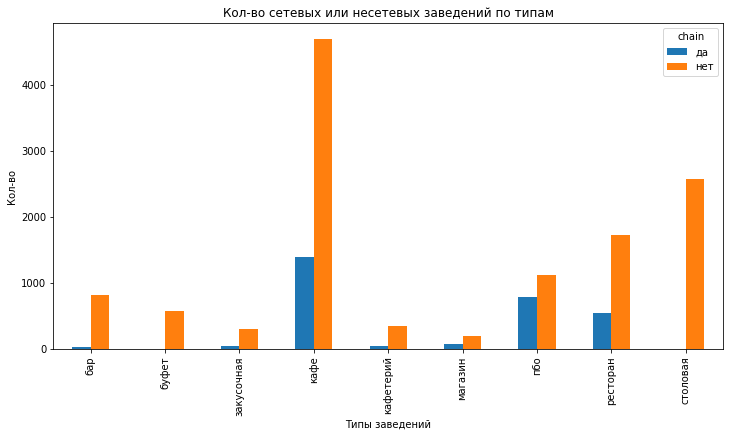

In [17]:
#построим гистограмму по сводной таблице
data_pivot.plot(kind='bar', figsize=(12,6))
plt.title('Кол-во сетевых или несетевых заведений по типам')
plt.xlabel('Типы заведений')
plt.ylabel('Кол-во');

Узнаем процент сетевых заведений от общего числа заведений.

In [18]:
#создадим новый столбец percent, в который запишем процент сетевых от общего кол-ва по типам
data_pivot['percent'] = data_pivot['да'] / (data_pivot['нет'] + data_pivot['да']) * 100

#округлим значения до двух знаков после запятой
data_pivot.sort_values(by='percent', ascending=False).round(2) 

chain,да,нет,percent
object_type,,,
пбо,791,1132,41.13
магазин,78,195,28.57
ресторан,544,1737,23.85
кафе,1396,4703,22.89
закусочная,56,304,15.56
кафетерий,52,346,13.07
бар,37,818,4.33
буфет,11,574,1.88
столовая,3,2582,0.12


##### Вывод   

Несетевых заведений в четыре раза больше, чем сетевых.  
Сетевое распространение в основном характерно для предприятий быстрого обслуживания - 41% имеют сеть, следующие по популярности отдеты общепита в магазинах, и примерно равные доли у ресторанов и кафе.  
Сетевое распространение не характерно для столовых и буфетов.

#### Исследуем среднее количество посадочных мест  

- для каждого вида объекта общественного питания

In [19]:
#выведем сводную таблицу по типам заведений и посчитаем среднее кол-во посадочных мест

data_number = data.pivot_table(index='object_type', values='number', aggfunc='mean').round()
data_number

,number
object_type,
бар,42.0
буфет,51.0
закусочная,8.0
кафе,40.0
кафетерий,9.0
магазин,6.0
пбо,21.0
ресторан,95.0
столовая,129.0


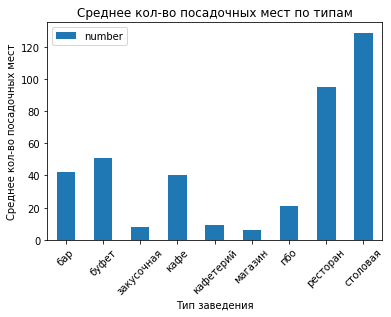

In [20]:
#построим график по сгруппированным данным

data_number.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Среднее кол-во посадочных мест по типам')
plt.xlabel('Тип заведения')
plt.ylabel('Среднее кол-во посадочных мест');

- для сетевых и не сетевых заведений

In [21]:
#сгруппируем по типам заведений и посчитаем среднее кол-во посадочных мест для сетевых и не сетевых

data_number_chain = data.pivot_table(index='object_type', columns='chain', values='number', aggfunc='mean').round()
data_number_chain

chain,да,нет
object_type,,
бар,53.0,41.0
буфет,13.0,52.0
закусочная,14.0,6.0
кафе,47.0,37.0
кафетерий,12.0,9.0
магазин,9.0,4.0
пбо,40.0,7.0
ресторан,100.0,93.0
столовая,112.0,129.0


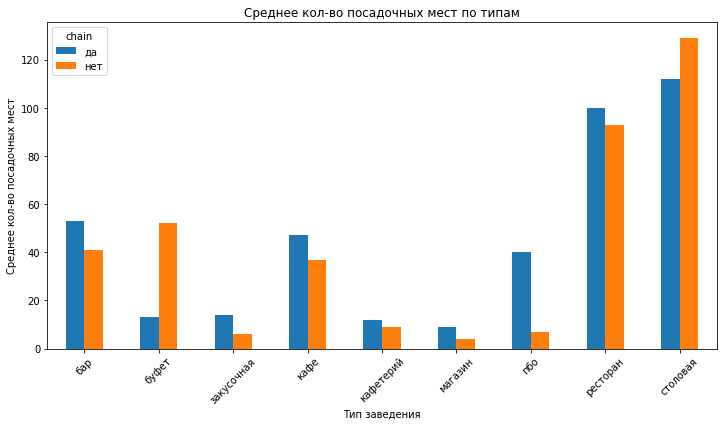

In [22]:
#построим график по сгруппированным данным

data_number_chain.plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45)
plt.title('Среднее кол-во посадочных мест по типам')
plt.xlabel('Тип заведения')
plt.ylabel('Среднее кол-во посадочных мест');

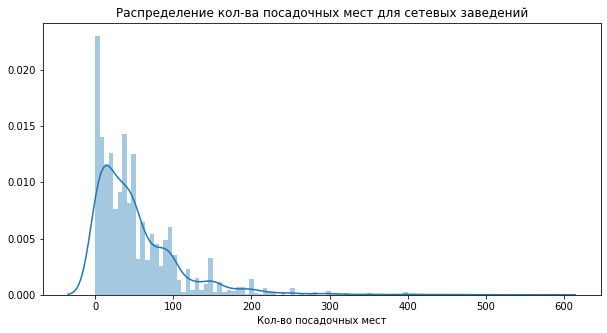

In [23]:
#отобразим на графике распределение кол-ва мест для сетевых заведений

plt.figure(figsize=(10, 5))
ax = sns.distplot(data.query('chain == "да"')['number'], bins=100)
ax.set_title('Распределение кол-ва посадочных мест для сетевых заведений')
ax.set_xlabel('Кол-во посадочных мест')
ax.set_ylabel('');

##### Вывод   

Всего два типа заведений: "Столовая" и "Ресторан" предоставляют в среднем самое большое количество посадочных мест - около 100. Остальные в среднем предоставляют около 40 мест. 
Наименьшее кол-во посадочных мест в закусочных, отделах в магазинах и кафетериях.

В большинстве сетевых заведений кол-во мест не превышает 100. Сетевые заведения подчиняются тому же правилу: наибольшее кол-во мест в ресторанах и столовых, а в остальных около 40. Только в сетевых буфетах кол-во мест в разы меньше, чем в целом в категории "Буфет". 

#### Изучим улицы с наибольшим  количеством объектов общественного питания  

- Добавим отдельный столбец с улицами, по нему мы соединим исходную таблицу с внешними данными, содержащими района и округа Москвы.

In [24]:
#выделим в отдельный столбец информацию об улице из столбца address

data['streetname'] = data['address'].str.split(',', expand=True)[1]
data.head()

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


In [25]:
#выгружаем данные из сторонней таблицы с районами Москвы

from io import BytesIO
import requests
spreadsheet_id = '1vWvASK6QSS4TvyXS5QkhhVVoBN7ObdVEEVmtRqRyLes'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_moscow = pd.read_csv(BytesIO(r.content))
data_moscow.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [26]:
#удалим пробелы в строках, чтобы привести к единому написанию перед соединением

data_moscow['streetname'] = data_moscow['streetname'].str.strip()
data['streetname'] = data['streetname'].str.strip()

#приведем к нижнему регистру столбцы 'okrug' и 'area'
data_moscow['okrug'] = data_moscow['okrug'].str.lower()
data_moscow['area'] = data_moscow['area'].str.lower()
data_moscow['streetname'] = data_moscow['streetname'].str.lower()
data_moscow.head()

,streetname,areaid,okrug,area
0,выставочный переулок,17,цао,пресненский район
1,улица гашека,17,цао,пресненский район
2,большая никитская улица,17,цао,пресненский район
3,глубокий переулок,17,цао,пресненский район
4,большой гнездниковский переулок,17,цао,пресненский район


In [27]:
#объединим таблицы

data_new = data.merge(data_moscow[['streetname','okrug','area']], on='streetname', how='left')
data_new.head()

,id,object_name,chain,object_type,address,number,streetname,okrug,area
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,свао,ярославский район
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,цао,таганский район
2,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,ювао,нижегородский район
3,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,юзао,район южное бутово
4,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,цао,таганский район


- Сгруппируем заведения по улицам и посчитаем их кол-во

In [28]:
#сгруппируем по улицам и посчитаем кол-во заведений

data_street = data.groupby('streetname', as_index=False).agg({'object_name':'count'})
data_street.head()

,streetname,object_name
0,1-й автозаводский проезд,3
1,1-й амбулаторный проезд,2
2,1-й балтийский переулок,1
3,1-й басманный переулок,1
4,1-й ботанический проезд,1


In [29]:
#отсортируем по убыванию и выведем первые 10

data_street_top_10 = data_street.sort_values(by='object_name', ascending=False).head(10)
data_street_top_10

,streetname,object_name
486,город зеленоград,232
1121,проспект мира,204
1125,профсоюзная улица,182
747,ленинградский проспект,171
1082,пресненская набережная,167
417,варшавское шоссе,161
750,ленинский проспект,147
1071,поселение сосенское,138
1118,проспект вернадского,131
663,каширское шоссе,112


Город Зеленоград и поселение Сосенское являются административным округом и внутригородским муниципальным образованием соответственно.

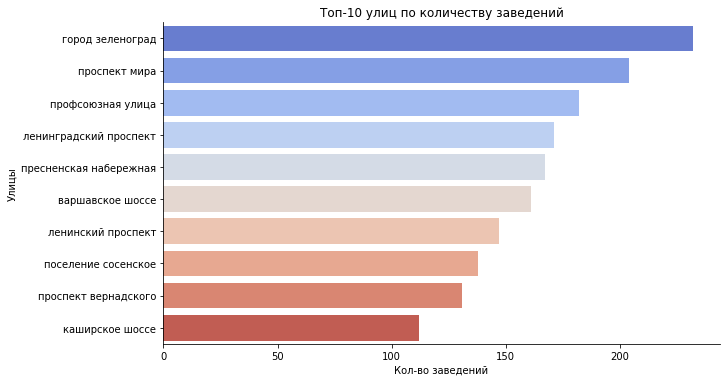

In [30]:
#построим график по сгруппированной таблице

ax=sns.catplot(x='object_name', y='streetname', kind='bar', data=data_street_top_10, palette='coolwarm', aspect=2)
ax.set(title = 'Топ-10 улиц по количеству заведений')
ax.set(ylabel = 'Улицы')
ax.set(xlabel = 'Кол-во заведений');

- Посмотрим на распределение количества посадочных мест 

In [31]:
#создадим сводную таблицу для топ-12 улиц и найдем среднее кол-во посадочных мест
data_street_number_top_10 = data.pivot_table(index=['streetname'], 
                                            values=['object_name','number'], 
                                            aggfunc={'object_name':'count','number':'mean'}).sort_values(by='object_name', ascending=False).round().head(10)
data_street_number_top_10

,number,object_name
streetname,,
город зеленоград,73.0,232
проспект мира,63.0,204
профсоюзная улица,46.0,182
ленинградский проспект,53.0,171
пресненская набережная,46.0,167
варшавское шоссе,53.0,161
ленинский проспект,63.0,147
поселение сосенское,23.0,138
проспект вернадского,58.0,131


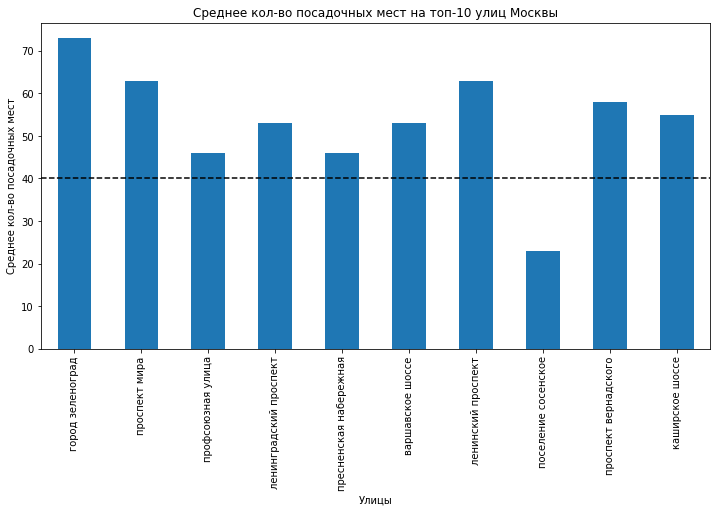

In [32]:
#построим график, отображающий среднее кол-во мест для каждой улицы
#обозначим линией среднее кол-во в 40 мест по всем заведениям

data_street_number_top_10['number'].plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=90)
plt.axhline(y=40, color='black', linestyle='--')
plt.title('Среднее кол-во посадочных мест на топ-10 улиц Москвы')
plt.xlabel('Улицы')
plt.ylabel('Среднее кол-во посадочных мест');

- Найдем топ-10 районов с заведениями общественного питания

In [33]:
#сгруппируем по районам, отсортируем по убыванию, выведем топ-10

data_new.pivot_table(index=['area'], values='object_name', aggfunc='count').sort_values(by='object_name', ascending=False).head(10)

,object_name
area,
тверской район,1127
пресненский район,788
басманный район,702
мещанский район,668
даниловский район,667
донской район,581
таганский район,528
обручевский район,492
район замоскворечье,479


Обозначим на карте расположение самых популярных улиц с заведениями общественного питания.

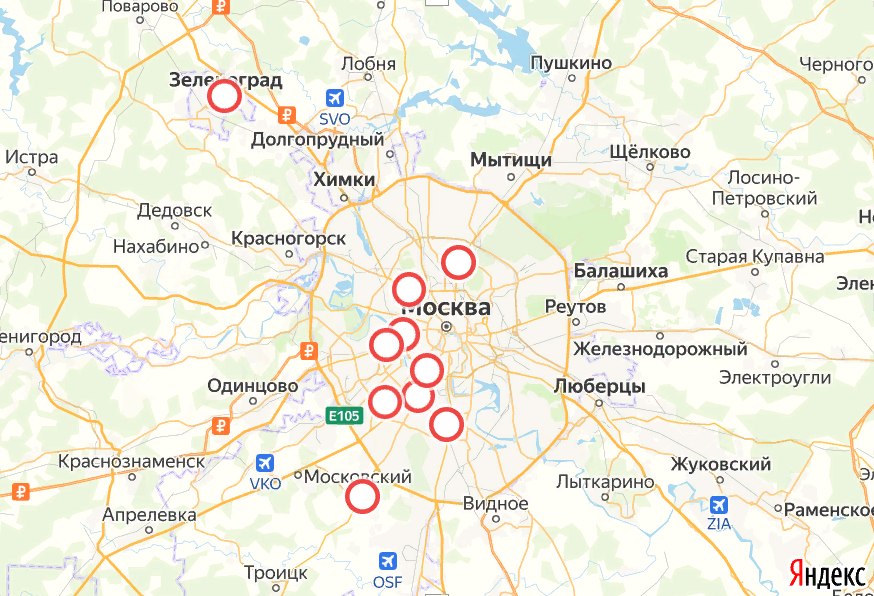

Ссылка на карту: https://yandex.ru/maps/?um=constructor%3A3b13d7a52e0abac6af8301c9efe6985e17f79c5553b2b4856d6c1aefb35651cd&source=constructorLink

![](https://yandex.ru/maps/?um=constructor%3A3b13d7a52e0abac6af8301c9efe6985e17f79c5553b2b4856d6c1aefb35651cd&source=constructorLink)

##### Вывод   

Отобразили на карте 10 объктов, не будем учитывать в исследовании данные для города Зеленоград и поселения Сосенское - это не улицы Москвы.

На карте можно заметить, что самые популярные улицы с заведениями общественного питания находятся не в историческом центре, но в центральньной части Москва пределах МКАД, в Юго-Западной и Южной частях Москвы, в районах с большим кол-вом парков, выставочных центров, спортивных объектов, университетов, а также бизнес- и торговых центров. При это самым популярным местом оказался проспект Мира на севере Москвы, это связано с близостью к ВДНХ и железнодорожными вокзалами.  

Среднее кол-во мест для заведений, находящихся на самых популярных улицах немного больше, чем в среднем по Москве - до 50-60 мест. Выделяется Кутузовский проспект, возможно в этом районе популярны рестораны или столовые.

#### Изучим улицы с наименьшим количеством объектов общественного питания

In [34]:
#посчитаем кол-во улиц с одним заведением

data_street.loc[data_street.loc[:,'object_name'] == 1].count()

streetname     579
object_name    579
dtype: int64

In [36]:
#сгруппируем по районам, отсортируем по возрастанию, выведем топ-10

data_new.pivot_table(index=['area'], values='object_name', aggfunc='count').sort_values(by='object_name').head(10)

,object_name
area,
район восточный,4
район некрасовка,8
район капотня,27
район новокосино,37
район куркино,40
район братеево,41
район бирюлево западное,58
район южное медведково,58
район косино-ухтомский,59


Обозначим на карте расположение десяти районов с наименьшим кол-вом заведением общественного питания.

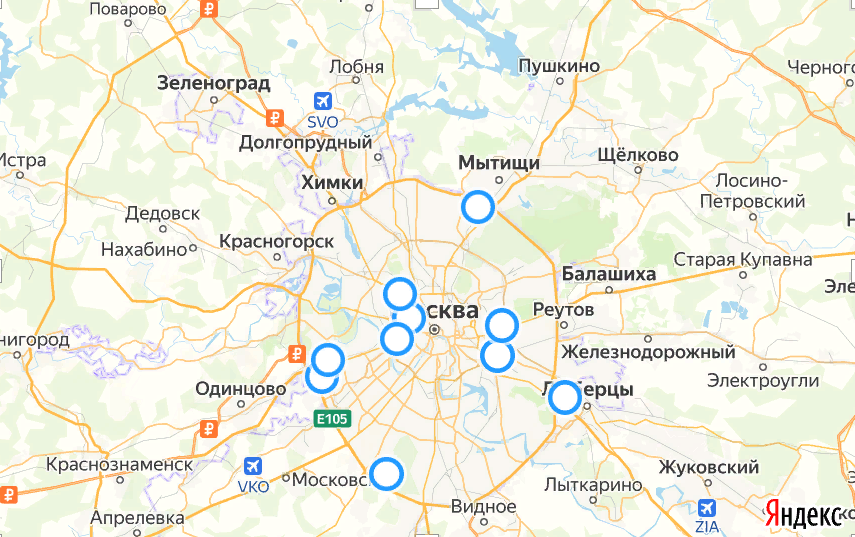

Ссылка на карту: https://yandex.ru/maps/?um=constructor%3Af7d4e373a30f5ea94da80b9f96de49c7892fc7c183832d9fbd281bc59707be38&source=constructorLink

#### Вывод  

В Москве более 500 улиц, на которых расположен всего один объект общественного питания. Если смотреть на карту, никакой закономерности в расположении не прослеживается, единственное, что объединяет эти улицы - это то, что они очень короткие, поэтому выбора помещений для аренды там не много.

## Итоги исследования  

Прежде чем исследовать данные, мы ознакомились с ними, проверили их корректность, привели к единому стилю написание, заменили некоторые длинные названия на короткие для удобства работы с графиками.

Исследуя данные, определили что:
- самое распространненое заведение общественного питания в Москве - это кафе;  
- несетевых заведений в четыре раза больше, чем сетевых; сетевое распространение в основном характерно для предприятий быстрого обслуживания - 41% имеют сеть, только 23% ресторанов и кафе имеют сетевое распространение;  
- в среднем заведения общественного питания предоставляют 40 посадочных мест, для самых популярных улиц кол-во мест немного выше - около 60;
- наибольшее кол-во заведений общественного питания расположены на Юго-Западе и Юге Москвы не в центре в пределах МКАД, вблизи парковых зон, музеев, торговых и бизнес-центров, спортивных объектов и учебных заведений.

**Рекомендации для открытия нового оригинального заведения с роботами:**  
- выбрать место на самых популярных улицах для общественного питания: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект;  
- поменять формат "Кафе" на "Предприятие быстрого обслуживания", в сегменте "Кафе" большая конкуренция, и множество оригинальных решений уже есть на рынке; 
- рассмотреть вариант расширения до сети;
- роботов использовать как кассиров и уборщиков, а не официантов;
- кол-во посадочных мест 40-50.
